In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
xls = pd.ExcelFile('EPIC.xlsx')
patients = pd.read_excel(xls, 'Patients')
admissions = pd.read_excel(xls, 'Admissions')
icu_stays = pd.read_excel(xls, 'ICU_Stays')
bypass_surgeries = pd.read_excel(xls, 'Bypass_Surgeries')
hemoblobin = pd.read_excel(xls, 'Haemoglobins')
transfusion = pd.read_excel(xls, 'Transfusions')

- patients:

'PATIENT_NUMBER', 'DOB', 'Gender'
admissions
'ADMISSION_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_TIME',
       'DISCHARGE_TIME'
- icu_stays:

'ICU_STAY_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER',
       'ICU_START_TIME', 'ICU_END_TIME'
- bypass_surgeries:

'SURGERY_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'START_TIME',
       'FINISH_TIME']
- hemoblobin:

'HAEMOGLOBIN_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'RESULT',
       'REFERENCE_LOW', 'REFERENCE_HIGH', 'REFERENCE_UNIT',
       'SPECIMEN_TAKEN_TIME', 'RESULT_TIME']
- transfusion:

'TRANSFUSION_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'VOLUME',
       'BLOOD_START_TIME', 'BLOOD_END_TIME'

patient_number= subject_id
admission_number = hamd_id

In [27]:
df = transfusion
print(df.columns)
df 

Index(['TRANSFUSION_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'VOLUME',
       'BLOOD_START_TIME', 'BLOOD_END_TIME'],
      dtype='object')


,TRANSFUSION_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,VOLUME,BLOOD_START_TIME,BLOOD_END_TIME
0,1,93,45,305.00,2022-04-13 21:16:00,2022-04-13 21:21:00
1,2,90,239,325.60,2021-04-13 05:53:00,2021-04-13 09:35:00
2,3,93,45,268.00,2022-04-16 09:37:00,2022-04-16 12:00:00
3,4,139,105,263.00,2022-04-02 09:55:00,2022-04-02 12:51:00
4,5,99,207,255.00,2021-12-07 20:00:00,2021-12-07 20:20:00
...,...,...,...,...,...,...
258,253,93,45,260.00,2022-04-18 16:25:00,2022-04-18 18:25:00
259,254,93,45,260.00,2022-04-27 11:22:00,2022-04-27 11:27:00
260,255,76,175,250.00,2021-08-31 17:50:00,2021-08-31 18:51:00
261,256,90,239,496.00,2021-04-11 17:17:00,2021-04-11 20:00:00


### blood transfusion

In [3]:
transfusion_patient = transfusion.merge(patients, how = 'left', on='PATIENT_NUMBER')
transfusion_patient.loc[transfusion_patient.BLOOD_START_TIME == "Null", 'BLOOD_END_TIME'] = transfusion_patient.BLOOD_START_TIME
transfusion_patient

,TRANSFUSION_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,VOLUME,BLOOD_START_TIME,BLOOD_END_TIME,DOB,Gender
0,1,93,45,305.00,2022-04-13 21:16:00,2022-04-13 21:21:00,1952-07-14,F
1,2,90,239,325.60,2021-04-13 05:53:00,2021-04-13 09:35:00,1951-05-18,M
2,3,93,45,268.00,2022-04-16 09:37:00,2022-04-16 12:00:00,1952-07-14,F
3,4,139,105,263.00,2022-04-02 09:55:00,2022-04-02 12:51:00,1950-07-13,M
4,5,99,207,255.00,2021-12-07 20:00:00,2021-12-07 20:20:00,1944-02-19,M
...,...,...,...,...,...,...,...,...
258,253,93,45,260.00,2022-04-18 16:25:00,2022-04-18 18:25:00,1952-07-14,F
259,254,93,45,260.00,2022-04-27 11:22:00,2022-04-27 11:27:00,1952-07-14,F
260,255,76,175,250.00,2021-08-31 17:50:00,2021-08-31 18:51:00,1966-08-11,M
261,256,90,239,496.00,2021-04-11 17:17:00,2021-04-11 20:00:00,1951-05-18,M


In [37]:
transfusion_patient.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender", "VOLUME": "totalamount", "BLOOD_START_TIME": "starttime"}, errors="raise")


,TRANSFUSION_NUMBER,PATIENT_NUMBER,hadm_id,totalamount,starttime,BLOOD_END_TIME,DOB,gender
0,1,93,45,305.00,2022-04-13 21:16:00,2022-04-13 21:21:00,1952-07-14,F
1,2,90,239,325.60,2021-04-13 05:53:00,2021-04-13 09:35:00,1951-05-18,M
2,3,93,45,268.00,2022-04-16 09:37:00,2022-04-16 12:00:00,1952-07-14,F
3,4,139,105,263.00,2022-04-02 09:55:00,2022-04-02 12:51:00,1950-07-13,M
4,5,99,207,255.00,2021-12-07 20:00:00,2021-12-07 20:20:00,1944-02-19,M
...,...,...,...,...,...,...,...,...
258,253,93,45,260.00,2022-04-18 16:25:00,2022-04-18 18:25:00,1952-07-14,F
259,254,93,45,260.00,2022-04-27 11:22:00,2022-04-27 11:27:00,1952-07-14,F
260,255,76,175,250.00,2021-08-31 17:50:00,2021-08-31 18:51:00,1966-08-11,M
261,256,90,239,496.00,2021-04-11 17:17:00,2021-04-11 20:00:00,1951-05-18,M


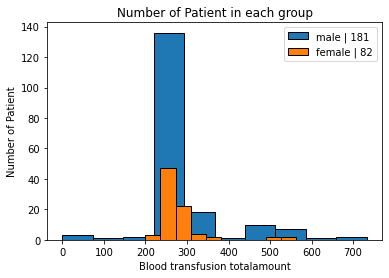

In [4]:
female = transfusion.loc[transfusion_patient.Gender == 'F' ].VOLUME
male = transfusion.loc[transfusion_patient.Gender == 'M' ].VOLUME
plt.hist(male,  edgecolor="black",label= f"male | {len(transfusion_patient.loc[transfusion_patient.Gender == 'M'])}")
plt.hist(female, edgecolor="black",label= f"female | {len(transfusion_patient.loc[transfusion_patient.Gender == 'F'])}")
plt.xlabel("Blood transfusion totalamount")
plt.ylabel("Number of Patient")
plt.title("Number of Patient in each group")
plt.legend()
plt.savefig(f'Bloodtransfusion_plots/EPIC_histplot_totalamount.png')
plt.show()

In [34]:
#blood_transfusion_count = transfusion_patient.groupby(['PATIENT_NUMBER'])['PATIENT_NUMBER'].count()
blood_transfusion_count = transfusion_patient.groupby(['ADMISSION_NUMBER']).size().reset_index(name='counts')
blood_transfusion_count = blood_transfusion_count.merge(transfusion_patient, how = 'left', on='ADMISSION_NUMBER')
#blood_transfusion_count = blood_transfusion_count.merge(patients, how = 'left', on='PATIENT_NUMBER')
blood_transfusion_count

,ADMISSION_NUMBER,counts,TRANSFUSION_NUMBER,PATIENT_NUMBER,VOLUME,BLOOD_START_TIME,BLOOD_END_TIME,DOB,Gender
0,2,5,36,268,220.0,NaT,2021-06-19 16:32:00,1965-04-20,M
1,2,5,97,268,259.0,2021-06-21 04:03:00,2021-06-21 06:00:00,1965-04-20,M
2,2,5,103,268,251.0,2021-06-20 18:10:00,2021-06-20 21:00:00,1965-04-20,M
3,2,5,112,268,224.0,2021-06-19 16:45:00,2021-06-19 18:10:00,1965-04-20,M
4,2,5,219,268,320.4,2021-06-20 02:18:00,2021-06-20 03:30:00,1965-04-20,M
...,...,...,...,...,...,...,...,...,...
258,257,2,82,165,518.0,2021-05-08 10:06:00,2021-05-08 11:15:00,1950-09-07,F
259,257,2,159,165,258.0,2021-05-09 10:21:00,2021-05-09 12:48:00,1950-09-07,F
260,259,1,105,128,496.0,2021-07-24 10:58:00,2021-07-24 14:08:00,1970-12-12,M
261,262,2,20,104,274.0,2021-09-23 15:46:00,2021-09-23 19:34:00,1952-09-05,M


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


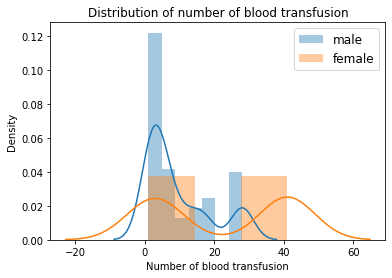

In [35]:
male_Hb = blood_transfusion_count[blood_transfusion_count.Gender == 'M']
sns.distplot(male_Hb['counts'], label='male')

female_Hb =blood_transfusion_count[blood_transfusion_count.Gender == 'F']
sns.distplot(female_Hb['counts'],label='female')

plt.legend(prop={'size': 12})
plt.title('Distribution of number of blood transfusion')
plt.xlabel('Number of blood transfusion')
plt.ylabel('Density')
plt.savefig(f'Bloodtransfusion_plots/EPIC_histplot_numberOfbloodTransfusion_gender.png')
plt.show()

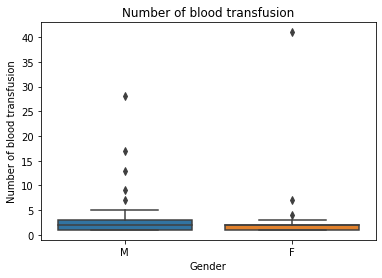

In [7]:
sns.boxplot(x="Gender", y='counts', data=blood_transfusion_count)
plt.title("Number of blood transfusion")
plt.ylabel('Number of blood transfusion')
plt.savefig(f'Bloodtransfusion_plots/EPIC_boxplot_numberOfbloodTransfusion_gender.png')
plt.show()

In [8]:

transfusion['BLOOD_START_TIME'] = pd.to_datetime(transfusion['BLOOD_START_TIME'])
transfusion['BLOOD_END_TIME'] = pd.to_datetime(transfusion['BLOOD_END_TIME'])
transfusion

,TRANSFUSION_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,VOLUME,BLOOD_START_TIME,BLOOD_END_TIME
0,1,93,45,305.00,2022-04-13 21:16:00,2022-04-13 21:21:00
1,2,90,239,325.60,2021-04-13 05:53:00,2021-04-13 09:35:00
2,3,93,45,268.00,2022-04-16 09:37:00,2022-04-16 12:00:00
3,4,139,105,263.00,2022-04-02 09:55:00,2022-04-02 12:51:00
4,5,99,207,255.00,2021-12-07 20:00:00,2021-12-07 20:20:00
...,...,...,...,...,...,...
258,253,93,45,260.00,2022-04-18 16:25:00,2022-04-18 18:25:00
259,254,93,45,260.00,2022-04-27 11:22:00,2022-04-27 11:27:00
260,255,76,175,250.00,2021-08-31 17:50:00,2021-08-31 18:51:00
261,256,90,239,496.00,2021-04-11 17:17:00,2021-04-11 20:00:00


-----
### hemoglobin

In [9]:
first_blood_transfusion = transfusion.groupby(['PATIENT_NUMBER']).agg(fbt=('BLOOD_START_TIME', 'min'))
first_blood_transfusion

,fbt
PATIENT_NUMBER,
1,2021-12-19 17:59:00
2,2022-06-28 15:49:00
6,2022-05-15 10:18:00
11,2021-08-11 16:25:00
14,2022-03-15 12:25:00
...,...
258,2022-04-15 14:19:00
262,2021-09-23 14:11:00
263,2022-02-26 15:08:00


In [10]:
hemoblobin['SPECIMEN_TAKEN_TIME'] = pd.to_datetime(hemoblobin['SPECIMEN_TAKEN_TIME'])
hemoblobin['RESULT_TIME'] = pd.to_datetime(hemoblobin['RESULT_TIME'])
hemoblobin

,HAEMOGLOBIN_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,RESULT,REFERENCE_LOW,REFERENCE_HIGH,REFERENCE_UNIT,SPECIMEN_TAKEN_TIME,RESULT_TIME
0,1767,239,44,89,115,150,g/L,2021-06-01 12:48:00,2021-06-01 12:49:00
1,1768,149,125,97,115,150,g/L,2022-01-10 14:33:00,2022-01-10 14:34:00
2,1769,257,155,149,115,150,g/L,2022-07-04 14:46:00,2022-07-04 15:00:00
3,1770,238,218,97,115,150,g/L,2021-12-01 15:58:00,2021-12-01 16:09:00
4,1771,72,180,102,120,170,g/L,2022-02-03 05:24:00,2022-02-03 06:42:00
...,...,...,...,...,...,...,...,...,...
7708,6200,43,136,134,115,150,g/L,2021-10-07 13:48:00,2021-10-07 13:49:00
7709,6201,167,229,77,115,150,g/L,2021-08-06 05:51:00,2021-08-06 05:52:00
7710,6202,196,16,95,120,170,g/L,2022-05-10 08:30:00,2022-05-10 11:05:00
7711,6203,44,191,99,130,170,g/L,2021-12-17 07:05:00,2021-12-17 09:39:00


## get same format of hemoglobin

In [11]:
hemoglobin_fbt = hemoblobin.merge(first_blood_transfusion, how = 'inner', on='PATIENT_NUMBER')
hemoglobin_fbt
pre_hemoglobin = hemoglobin_fbt[hemoglobin_fbt.SPECIMEN_TAKEN_TIME < hemoglobin_fbt.fbt ]
pre_hemoglobin = pre_hemoglobin.groupby(['PATIENT_NUMBER']).agg(pre_hemoglobin=('SPECIMEN_TAKEN_TIME', 'min'))
#pre_hemoglobin = pre_hemoglobin.merge(hemoblobin, how = 'left', on='HAEMOGLOBIN_NUMBER')
post_hemoglobin = hemoglobin_fbt[hemoglobin_fbt.SPECIMEN_TAKEN_TIME > hemoglobin_fbt.fbt ]
post_hemoglobin = post_hemoglobin.groupby(['PATIENT_NUMBER']).agg(post_hemoglobin=('SPECIMEN_TAKEN_TIME', 'min'))
#post_hemoglobin = post_hemoglobin.merge(hemoblobin, how = 'left', on='HAEMOGLOBIN_NUMBER')

In [18]:
pre_hemoglobin
hemoglobin_fbt

,HAEMOGLOBIN_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,RESULT,REFERENCE_LOW,REFERENCE_HIGH,REFERENCE_UNIT,SPECIMEN_TAKEN_TIME,RESULT_TIME,fbt
0,1767,239,44,89,115,150,g/L,2021-06-01 12:48:00,2021-06-01 12:49:00,2021-06-01 11:52:00
1,2046,239,44,88,120,170,g/L,2021-06-01 14:38:00,2021-06-01 15:16:00,2021-06-01 11:52:00
2,7354,239,44,78,115,150,g/L,2021-06-01 11:21:00,2021-06-01 11:22:00,2021-06-01 11:52:00
3,949,239,44,87,120,170,g/L,2021-06-06 09:00:00,2021-06-06 11:08:00,2021-06-01 11:52:00
4,6414,239,44,80,115,150,g/L,2021-06-01 19:43:00,2021-06-01 19:48:00,2021-06-01 11:52:00
...,...,...,...,...,...,...,...,...,...,...
4020,5141,244,53,34,115,150,g/L,2022-03-08 13:32:00,2022-03-08 13:33:00,2022-03-10 09:41:00
4021,5261,244,53,97,115,150,g/L,2022-03-10 15:29:00,2022-03-10 15:30:00,2022-03-10 09:41:00
4022,840,244,53,83,120,170,g/L,2022-03-12 05:33:00,2022-03-12 07:04:00,2022-03-10 09:41:00
4023,2888,244,53,90,120,170,g/L,2022-03-10 15:14:00,2022-03-10 17:44:00,2022-03-10 09:41:00


In [12]:
# hemoglobin_all = pre_hemoglobin.merge(post_hemoglobin, how = 'inner', on='PATIENT_NUMBER')
# hemoglobin_all

-----
## icu

In [13]:
icu_stays_patient = icu_stays.merge(patients, how = 'left', on='PATIENT_NUMBER')
icu_stays_patient['ICU_START_TIME'] = pd.to_datetime(icu_stays_patient['ICU_START_TIME'])
icu_stays_patient['ICU_END_TIME'] = pd.to_datetime(icu_stays_patient['ICU_END_TIME'])
icu_stays_patient['ICU_stay_time'] = icu_stays_patient['ICU_END_TIME'] - icu_stays_patient['ICU_START_TIME']
icu_stays_patient

,ICU_STAY_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,ICU_START_TIME,ICU_END_TIME,DOB,Gender,ICU_stay_time
0,382,39,110,2021-07-05 13:14:00,2021-07-07 15:49:00,1945-07-08,M,2 days 02:35:00
1,487,39,110,2021-07-05 13:14:00,2021-07-07 15:49:00,1945-07-08,M,2 days 02:35:00
2,498,39,110,2021-07-05 13:14:00,2021-07-07 15:49:00,1945-07-08,M,2 days 02:35:00
3,545,39,110,2021-07-05 13:14:00,2021-07-07 15:49:00,1945-07-08,M,2 days 02:35:00
4,257,56,252,2021-02-24 16:25:00,2021-02-26 13:12:00,1952-03-03,M,1 days 20:47:00
...,...,...,...,...,...,...,...,...
858,658,37,154,2022-03-10 13:39:00,2022-03-11 13:58:00,1987-06-15,F,1 days 00:19:00
859,822,37,154,2022-03-10 13:39:00,2022-03-11 13:58:00,1987-06-15,F,1 days 00:19:00
860,290,185,256,2022-06-02 19:08:00,2022-06-03 18:00:00,1959-04-11,M,0 days 22:52:00
861,405,185,256,2022-06-02 19:08:00,2022-06-03 18:00:00,1959-04-11,M,0 days 22:52:00


In [14]:
icu_total_stay=icu_stays_patient.groupby(['PATIENT_NUMBER'])['ICU_stay_time'].agg(icu_total_time='sum')
icu_total_stay = icu_total_stay.merge(patients, how = 'left', on='PATIENT_NUMBER')
icu_total_stay

,PATIENT_NUMBER,icu_total_time,DOB,Gender
0,3,10 days 19:48:00,1946-12-03,M
1,4,8 days 04:44:00,1952-09-11,M
2,5,2 days 05:42:00,1943-10-24,M
3,6,2 days 18:57:00,1950-12-29,M
4,8,2 days 13:36:00,1944-09-10,F
...,...,...,...,...
170,259,5 days 20:50:00,1946-01-03,M
171,260,1 days 19:54:00,1967-06-28,M
172,261,3 days 00:45:00,1960-03-18,M
173,263,15 days 04:20:00,1954-04-16,M


In [15]:
icu_stays_patient_count = transfusion_patient.groupby(['PATIENT_NUMBER']).size().reset_index(name='counts')
icu_stays_patient_count = icu_stays_patient_count.merge(patients, how = 'left', on='PATIENT_NUMBER')
icu_stays_patient_count

,PATIENT_NUMBER,counts,DOB,Gender
0,1,1,1964-09-17,M
1,2,2,1950-12-22,M
2,6,1,1950-12-29,M
3,11,2,1936-09-27,F
4,14,4,1944-04-28,M
...,...,...,...,...
74,258,1,1966-10-07,F
75,262,2,1949-06-08,M
76,263,1,1954-04-16,M
77,266,1,1966-05-27,F


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


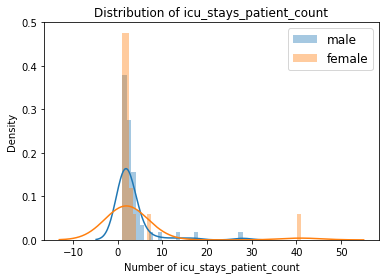

In [16]:
male_Hb = blood_transfusion_count[icu_stays_patient_count.Gender == 'M']
sns.distplot(male_Hb['counts'], label='male')

female_Hb =blood_transfusion_count[icu_stays_patient_count.Gender == 'F']
sns.distplot(female_Hb['counts'],label='female')

plt.legend(prop={'size': 12})
plt.title('Distribution of icu_stays_patient_count')
plt.xlabel('Number of icu_stays_patient_count')
plt.ylabel('Density')
plt.savefig(f'Bloodtransfusion_plots/EPIC_histplot_numberOfbloodTransfusion_gender.png')
plt.show()

In [38]:
bypass_surgeries
bypass_surgeries_total=bypass_surgeries.groupby(['ADMISSION_NUMBER'])['ICU_stay_time'].agg(icu_total_time='sum')

TypeError: Must provide 'func' or tuples of '(column, aggfunc).